In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
unfiltered_data=pd.read_csv('../raw_data/cleaned_data_040321.csv',encoding='latin-1')

## Encoding

In [2]:
# Gender Encoding
ohe_sex = OneHotEncoder(sparse = False)
ohe_sex.fit(unfiltered_data[['Dem_gender']]) 


ohe_sex.categories_


unfiltered_data[['Female','Male','Other']]= ohe_sex.transform(unfiltered_data[['Dem_gender']])

unfiltered_data.drop(columns='Dem_gender',inplace=True)

##############  Dem_edu

unfiltered_data['Dem_edu'] = unfiltered_data['Dem_edu'].replace({'Uninformative response':0,'None':1,'Up to 6 years of school':2, 'Up to 9 years of school':3, 'Up to 12 years of school':4, 'Some College, short continuing education or equivalent':5, 'College degree, bachelor, master': 6, 'PhD/Doctorate':7 })

##############  Dem_edu_mom

unfiltered_data['Dem_edu_mom'].value_counts()

unfiltered_data['Dem_edu_mom'] = unfiltered_data['Dem_edu_mom'].replace({'Uninformative response':0,'None':1,'Up to 6 years of school':2, 'Up to 9 years of school':3, 'Up to 12 years of school':4, 'Some College or equivalent':5, 'College degree': 6, 'PhD/Doctorate':7 })

### Dem_riskgroup

unfiltered_data['Dem_riskgroup'] = unfiltered_data['Dem_riskgroup'].replace({'No':1,'Not sure':2, 'Yes':3})

## Dem_maritalstatus

ohe_marital = OneHotEncoder(sparse = False)
ohe_marital.fit(unfiltered_data[['Dem_maritalstatus']]) 
ohe_marital.categories_

unfiltered_data[['Divorced/widowed','Married/cohabiting','Other or would rather not say','Single','Uninformative response']]= ohe_marital.transform(unfiltered_data[['Dem_maritalstatus']])

unfiltered_data.drop(columns='Dem_maritalstatus',inplace=True)

##### Dem_Expat

unfiltered_data['Dem_Expat'] = unfiltered_data['Dem_Expat'].replace({'no':0,'yes':1})

##### Dem_isolation

ohe_isolation = OneHotEncoder(sparse = False)
ohe_isolation.fit(unfiltered_data[['Dem_isolation']]) 
ohe_isolation.categories_

unfiltered_data[['no opinion','Isolated','Isolated in medical facility of similar location','Life carries on as usual','Life carries on with minor changes']]= ohe_isolation.transform(unfiltered_data[['Dem_isolation']])

unfiltered_data.drop(columns='Dem_isolation',inplace=True)

## Dem_employement

ohe_employment = OneHotEncoder(sparse = False)
ohe_employment.fit(unfiltered_data[['Dem_employment']]) 
# ohe_employment.categories_

unfiltered_data[['Full time employed','Not employed','Part time employed','Retired','Self-employed','Student']]= ohe_employment.transform(unfiltered_data[['Dem_employment']])

unfiltered_data.drop(columns='Dem_employment',inplace=True)

In [27]:
unfiltered_data.columns

unfiltered_data.drop(columns=['Unnamed: 0','UserLanguage'],inplace=True)

unfiltered_data.head()

new_df=unfiltered_data.drop(columns=['Country','Dem_isolation_adults','Dem_isolation_kids'])

# for i in new_df.columns:
#     print (i)

# SMALLER DF

In [32]:
new_df = new_df.sample(45000)

In [33]:
new_df.head()

,Dem_age,Dem_edu,Dem_edu_mom,Dem_Expat,Dem_dependents,Dem_riskgroup,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,Scale_PSS10_UCLA_5,Scale_PSS10_UCLA_6,Scale_PSS10_UCLA_7,Scale_PSS10_UCLA_8,Scale_PSS10_UCLA_9,Scale_PSS10_UCLA_10,Scale_SLON_1,Scale_SLON_2,Scale_SLON_3,OECD_people_1,OECD_people_2,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,OECD_insititutions_5,OECD_insititutions_6,Corona_concerns_1,Corona_concerns_2,Corona_concerns_3,Corona_concerns_4,Corona_concerns_5,Trust_countrymeasure,Compliance_1,Compliance_2,Compliance_3,Compliance_4,Compliance_5,Compliance_6,BFF_15_1,BFF_15_2,BFF_15_3,BFF_15_4,BFF_15_5,BFF_15_6,BFF_15_7,BFF_15_8,BFF_15_9,BFF_15_10,BFF_15_11,BFF_15_12,BFF_15_13,BFF_15_14,BFF_15_15,Expl_Distress_1,Expl_Distress_2,Expl_Distress_3,Expl_Distress_4,Expl_Distress_5,Expl_Distress_6,Expl_Distress_7,Expl_Distress_8,Expl_Distress_9,Expl_Distress_10,Expl_Distress_11,Expl_Distress_12,Expl_Distress_13,Expl_Distress_14,Expl_Distress_15,Expl_Distress_16,Expl_Distress_17,Expl_Distress_18,Expl_Distress_19,Expl_Distress_20,Expl_Distress_21,Expl_Distress_22,Expl_Distress_23,Expl_Distress_24,SPS_1,SPS_2,SPS_3,SPS_4,SPS_5,SPS_6,SPS_7,SPS_8,SPS_9,SPS_10,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,PSS10_avg,SLON3_avg,neu,ext,ope,agr,con,SPS_avg,Female,Male,Other,Divorced/widowed,Married/cohabiting,Other or would rather not say,Single,Uninformative response,no opinion,Isolated,Isolated in medical facility of similar location,Life carries on as usual,Life carries on with minor changes,Full time employed,Not employed,Part time employed,Retired,Self-employed,Student
1807,20,5,5,0,0.0,1,2.0,4.0,5.0,3.0,3.0,4.0,4.0,3.0,5.0,4.0,5.0,1.0,5.0,4.0,9.0,1.0,7.0,0.0,3.0,3.0,5.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,2.0,4.0,6.0,3.0,2.0,5.0,6.0,1.0,5.0,4.0,3.0,6.0,6.0,6.0,1.0,4.0,5.0,6.0,4.0,4.0,6.0,4.0,99.0,6.0,4.0,3.0,1.0,5.0,99.0,6.0,4.0,6.0,6.0,4.0,6.0,4.0,1.0,6.0,6.0,2.0,5.0,1.0,6.0,1.0,6.0,5.0,2.0,5.0,5.0,1.0,6.0,6.0,5.0,5.0,4.0,6.0,6.0,1.0,2.0,5.0,6.0,3.0,1.0,1.0,4.0,5.0,5.0,1.0,4.0,4.0,3.0,4.0,1.0,1.0,3.0,3.5,3.666667,5.666667,4.333333,6.000000,5.000000,4.333333,4.600000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23936,45,6,4,0,2.0,3,1.0,1.0,3.0,4.0,4.0,2.0,4.0,4.0,3.0,1.0,2.0,2.0,3.0,8.0,9.0,9.0,9.0,8.0,9.0,8.0,9.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,3.0,1.0,3.0,3.0,5.0,5.0,5.0,1.0,6.0,6.0,6.0,2.0,4.0,5.0,3.0,3.0,5.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,1.9,2.333333,2.666667,5.333333,6.000000,4.666667,4.000000,4.911471,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
11347,26,5,6,1,0.0,1,2.0,3.0,4.0,2.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,4.0,9.0,10.0,5.0,8.0,8.0,9.0,9.0,8.0,2.0,3.0,4.0,5.0,6.0,5.0,5.0,3.0,4.0,3.0,5.0,1.0,4.0,3.0,6.0,5.0,6.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,2.0,2.0,5.0,2.0,99.0,99.0,2.0,1.0,6.0,1.0,99.0,99.0,5.0,5.0,3.0,3.0,2.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,2.0,5.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,1.0,1.0,4.0,5.0,3.0,5.0,5.0,5.0,1.0,5.0,6.0,5.0,3.0,5.0,2.0,4.0,3.3,3.666667,2.666667,5.333333,3.666667,4.333333,4.000000,4.900000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
71788,36,6,6,0,2.0,3,3.0,4.0,4.0,4.0,3.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,2.0,7.0,8.0,6.0,6.0,7.0,8.0,7.0,6.0,5.0,6.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,2.0,5.0,2.0,5.0,5.0,4.0,3.0,1.0,6.0,3.0,4.0,5.0,2.0,5.0,4.0,3.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,4.0,1.0,4.0,4.0,4.0,3.0,5.0,6.0,5.0,3.0,1.0,4.0,1.0,1.0,2.0,4.0,1.0,2.0,1.0,4.0,4.0,5.0,6.0,5.0,4.0,

# 3. Feature selection for PREDICTING "PSS10_avg"

In [169]:
X = new_df[['BFF_15_1','BFF_15_2','BFF_15_3','BFF_15_4','BFF_15_5','BFF_15_6','BFF_15_7','BFF_15_8','BFF_15_9','BFF_15_10','BFF_15_11',
           'BFF_15_12','BFF_15_13','BFF_15_14','BFF_15_15',
            "Dem_age","Dem_edu","Dem_riskgroup",'Female','Male','Other','Divorced/widowed',
            'Married/cohabiting','Other or would rather not say','Single','Uninformative response','no opinion','Isolated',
            'Isolated in medical facility of similar location','Life carries on as usual','Life carries on with minor changes',
            'Full time employed','Not employed','Part time employed','Retired','Self-employed']].reset_index(drop=True)
y = new_df["PSS10_avg"]

In [155]:
# provisional_removed=["Dem_age","Dem_edu","Dem_riskgroup",'Female','Male','Other','Divorced/widowed',
#             'Married/cohabiting','Other or would rather not say','Single','Uninformative response','no opinion','Isolated',
#             'Isolated in medical facility of similar location','Life carries on as usual','Life carries on with minor changes',
#             'Full time employed','Not employed','Part time employed','Retired','Self-employed']

In [156]:
# y to rounded/integers 

In [157]:
y

1807     3.5
23936    1.9
11347    3.3
71788    3.3
49186    2.1
        ... 
19133    3.3
23965    1.7
23890    3.2
72486    3.0
134      2.4
Name: PSS10_avg, Length: 45000, dtype: float64

In [170]:
y = y.round()

In [171]:
y = y.astype(int)

In [172]:
y

1807     4
23936    2
11347    3
71788    3
49186    2
        ..
19133    3
23965    2
23890    3
72486    3
134      2
Name: PSS10_avg, Length: 45000, dtype: int64

In [90]:
X.shape

(45000, 36)

In [236]:
# plt.hist(X['BFF_15_1'])

In [237]:
# plt.hist(X_scaled[0])

# 4.1 Scaling as SCIKITLEARN sugest

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(X_train)
# X_scaled = scaler.transform(X_train)

In [238]:
# scaler.mean_

In [239]:
# scaler.scale_

In [240]:
# X_scaled

In [241]:
# X_scaled.mean(axis=0)

In [121]:
# X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

# 4. Feature Scaling

In [145]:
from sklearn.preprocessing import MinMaxScaler

m_scaler = MinMaxScaler() # Instanciate Robust Scaler

m_scaler.fit(X) # Fit scaler to feature

X_scaled = m_scaler.transform(X) #Scale

X_scaled

array([[0.8, 1. , 0. , ..., 0. , 0. , 0. ],
       [0.4, 0.4, 0.8, ..., 0. , 0. , 0. ],
       [0.6, 0.4, 1. , ..., 0. , 0. , 0. ],
       ...,
       [1. , 0.8, 0.8, ..., 0. , 0. , 0. ],
       [0.8, 0.4, 0.8, ..., 1. , 0. , 0. ],
       [0.8, 0.4, 0.8, ..., 0. , 0. , 0. ]])

In [146]:
X_scaled = pd.DataFrame(data=X_scaled)

In [95]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.839062,-1.030481,-0.249892,1.259924,0.680641,0.276038,0.562110,0.249007,1.263213,-0.604279,0.575472,0.284224,1.352613,-0.852842,0.268854,-1.225766,-0.470995,0.639994,0.626919,-0.611250,-0.101206,-0.286738,-1.085778,5.062333,-0.725753,-0.020417,-0.010542,1.291683,-0.032932,-0.230086,-1.160256,1.039444,-0.307827,-0.316614,-0.274,-0.340845
1,0.839062,1.128516,0.607860,-1.873511,-1.474045,1.714153,-0.334397,1.083123,-0.330970,0.187266,1.469254,1.304065,1.352613,1.290825,1.327450,-0.935330,-1.408246,0.639994,0.626919,-0.611250,-0.101206,-0.286738,0.920999,-0.197537,-0.725753,-0.020417,-0.010542,1.291683,-0.032932,-0.230086,-1.160256,-0.962053,3.248580,-0.316614,-0.274,-0.340845
2,0.839062,-1.030481,-0.249892,0.476565,0.680641,-1.162076,0.562110,-0.585109,0.466121,-1.395825,0.575472,0.284224,1.352613,-1.567398,1.327450,1.605988,0.466256,0.639994,0.626919,-0.611250,-0.101206,-0.286738,0.920999,-0.197537,-0.725753,-0.020417,-0.010542,-0.774184,-0.032932,-0.230086,0.861879,-0.962053,-0.307827,3.158419,-0.274,-0.340845
3,-1.308301,-0.310816,0.607860,1.259924,1.398870,-1.881134,0.562110,-2.253342,0.466121,-1.395825,0.575472,-0.735617,0.473706,-0.852842,0.268854,-0.717503,0.466256,0.639994,-1.595103,1.635992,-0.101206,-0.286738,-1.085778,-0.197537,1.377879,-0.020417,-0.010542,-0.774184,-0.032932,-0.230086,0.861879,1.039444,-0.307827,-0.316614,-0.274,-0.340845
4,0.123275,0.408850,-1.107643,-1.873511,-1.474045,0.276038,-1.230905,-2.253342,-1.128062,0.978812,-1.212093,-1.755458,-0.405200,-0.138286,-0.789742,0.807288,-1.408246,0.639994,0.626919,-0.611250,-0.101206,3.487507,-1.085778,-0.197537,-0.725753,-0.020417,-0.010542,-0.774184,-0.032932,-0.230086,0.861879,1.039444,-0.307827,-0.316614,-0.274,-0.340845


In [96]:
# new_df.columns

In [97]:
# X_scaled.columns = X.columns

In [98]:
# X_scaled.head()

# ORDINAL LOGISTIC REGRESSION

In [99]:
# pip install mord

In [175]:
# choose models
from sklearn.linear_model import LinearRegression, LogisticRegression
from mord import LogisticAT

# instantiate models
model_linear = LinearRegression()
model_1vR = LogisticRegression(max_iter=10000,
                               multi_class='ovr',
                               class_weight='balanced')
model_multi = LogisticRegression(max_iter=10000,
                                 multi_class='multinomial',
                                 solver='lbfgs',
                                 class_weight='balanced')
model_ordinal = LogisticAT(alpha=0)  # alpha parameter set to zero to perform no regularisation

In [163]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
import numpy as np

In [176]:
# divide df into features matrix and target vector
features = X_train
target = y_train

In [177]:
target

31623    4
44976    3
3871     2
33668    2
28556    3
        ..
1857     3
53018    3
49141    2
34608    3
51118    3
Name: PSS10_avg, Length: 36000, dtype: int64

In [229]:
MAE = make_scorer(mean_absolute_error)
folds = 5

print('Mean absolute error:' )
MAE_linear = cross_val_score(model_linear,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Linear regression: ', np.mean(MAE_linear))
MAE_1vR = cross_val_score(model_1vR,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Logistic regression (one versus rest): ', np.mean(MAE_1vR))
MAE_multi = cross_val_score(model_multi,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Logistic regression (multinomial): ', np.mean(MAE_multi))
MAE_ordinal = cross_val_score(model_ordinal,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Ordered logistic regression: ', np.mean(MAE_ordinal))

Mean absolute error:
Linear regression:  0.5366968576196167
Logistic regression (one versus rest):  0.7768333333333335
Logistic regression (multinomial):  0.9163333333333334
Ordered logistic regression:  0.47886111111111107


In [167]:
from sklearn.metrics import accuracy_score

def acc_fun(target_true, target_fit):
    target_fit = np.round(target_fit)
    target_fit.astype('int')
    return accuracy_score(target_true, target_fit)

acc = make_scorer(acc_fun)
folds = 5

print('Accuracy:' )
acc_linear = cross_val_score(model_linear,
    features,
    target,
    cv=folds,
    scoring=acc)
print('Linear regression: ', np.mean(acc_linear))
acc_1vR = cross_val_score(model_1vR,
    features,
    target,
    cv=folds,
    scoring=acc)
print('Logistic regression (one versus rest): ', np.mean(acc_1vR))
acc_multi = cross_val_score(model_multi,
    features,
    target,
    cv=folds,
    scoring=acc)
print('Logistic regression (multinomial): ', np.mean(acc_multi))
acc_ordinal = cross_val_score(model_ordinal,
    features,
    target,
    cv=folds,
    scoring=acc)
print('Ordered logistic regression: ', np.mean(acc_ordinal))

Accuracy:
Linear regression:  0.5429444444444445
Logistic regression (one versus rest):  0.4127777777777778
Logistic regression (multinomial):  0.3232777777777778
Ordered logistic regression:  0.5505


In [179]:
# MODEL ORDINAL

In [180]:
model_ordinal.fit(X_train,y_train)

LogisticAT(alpha=0)

In [202]:
y_pred = model_ordinal.predict(X_test)

In [207]:
y_true = y_test
y_true

49665    3
49520    4
13608    2
55545    2
24316    3
        ..
50347    3
36112    2
22810    2
16760    3
34450    3
Name: PSS10_avg, Length: 9000, dtype: int64

In [220]:
y_true.reset_index(drop=True,inplace=True)

In [242]:
df_compare = pd.DataFrame()
df_compare['y_pred'] = y_pred
df_compare['y_true'] = y_true
df_compare.head(50)

,y_pred,y_true
0,3,3
1,3,4
2,2,2
3,3,2
4,3,3
5,2,3
6,2,2
7,2,2
8,3,4
9,2,3


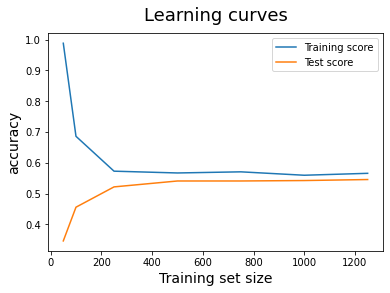

In [230]:
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import numpy as np
# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = model_ordinal,
                                                              X = X,
                                                              y = y,
                                                              train_sizes = [50,100,250,500,750,1000,1250],
                                                              cv = 10,
                                                              scoring = 'accuracy')
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [234]:
# from sklearn.metrics import classification_report

# print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.00      0.00       415
           2       0.62      0.65      0.64      3997
           3       0.49      0.66      0.56      3385
           4       0.55      0.11      0.18      1154
           5       0.00      0.00      0.00        49

    accuracy                           0.55      9000
   macro avg       0.43      0.28      0.28      9000
weighted avg       0.55      0.55      0.52      9000



/home/antoniovmonge/.pyenv/versions/3.8.6/envs/psycovid/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/antoniovmonge/.pyenv/versions/3.8.6/envs/psycovid/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/antoniovmonge/.pyenv/versions/3.8.6/envs/psycovid/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

# other

In [96]:
# df['Dem_age'].hist(bins=20)

<AxesSubplot:>

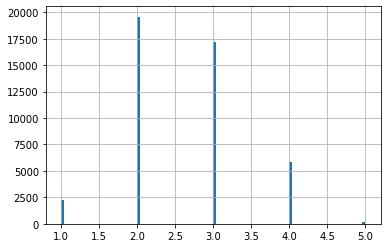

In [168]:
y.hist(bins=100)

In [122]:
names = ['Low', 'Medium', 'High']

# df_3['Stress_Level'] = pd.cut(df_3['PSS10_avg'], 3, labels=names)
y = pd.cut(y, 3, labels=names)

In [123]:
y

0           Low
1           Low
2           Low
3        Medium
4        Medium
          ...  
85484       Low
85485       Low
85486    Medium
85487       Low
85488       Low
Name: PSS10_avg, Length: 85489, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

# Hold Out

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Base Modelling

In [128]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score

# model = LogisticRegression(max_iter=1000,n_jobs=-1)

# scores = cross_val_score(model, X_train, y_train, cv=10)

# base_model_score = scores.mean()

# base_model_score

0.5945842271197981

In [118]:
# X_train.describe()

,BFF_15_1,BFF_15_2,BFF_15_3,BFF_15_4,BFF_15_5,BFF_15_6,BFF_15_7,BFF_15_8,BFF_15_9,BFF_15_10,BFF_15_11,BFF_15_12,BFF_15_13,BFF_15_14,BFF_15_15,Dem_age,Dem_edu,Dem_riskgroup,Female,Male,Other,Divorced/widowed,Married/cohabiting,Other or would rather not say,Single,Uninformative response,no opinion,Isolated,Isolated in medical facility of similar location,Life carries on as usual,Life carries on with minor changes,Full time employed,Not employed,Part time employed,Retired,Self-employed
count,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000
mean,3.834419,3.434939,4.288755,4.384779,4.050841,3.621314,4.374339,4.706531,4.420780,2.763867,4.350961,4.725876,4.460499,3.195803,4.751279,38.931438,5.510013,2.455052,0.720813,0.268956,0.010231,0.073729,0.544197,0.038637,0.343035,0.000402,0.000140,0.372855,0.001030,0.050841,0.575135,0.478918,0.087051,0.094244,0.069452,0.104527
std,1.399730,1.392446,1.165276,1.281975,1.397335,1.396412,1.114153,1.197252,1.255422,1.269772,1.123300,0.982803,1.146201,1.401359,0.943001,13.771971,1.060216,0.848660,0.448604,0.443421,0.100630,0.261332,0.498047,0.192729,0.474727,0.020035,0.011818,0.483568,0.032079,0.219674,0.494327,0.499560,0.281912,0.292170,0.254223,0.305946
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,2.000000,4.000000,28.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,3.000000,5.000000,37.000000,6.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,49.000000,6.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,92.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
# y_train

41485    3.0
1661     2.0
54661    3.0
33560    2.0
23257    2.0
        ... 
6265     1.0
54886    2.0
76820    3.0
860      2.0
15795    2.0
Name: PSS10_avg, Length: 57277, dtype: float64

# KNeighborsClassifier

In [235]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

# Instanciate the model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model on the scaled Training data
cv_results = cross_validate(knn_model, X_train,y_train)

base_knn_score = cv_results['test_score'].mean()

base_knn_score

# scores = cross_val_score(model, X_train, y_train, cv=10)

# base_model_score = scores.mean()

# base_model_score

0.45916666666666667

# Feature permutation in Sklearn

In [ ]:
# from sklearn.inspection import permutation_importance

# log_model = LogisticRegression(max_iter=1000).fit(X, y) # Fit model

# permutation_score = permutation_importance(log_model, X, y, n_repeats=100) # Perform Permutation

# importance_df = pd.DataFrame(np.vstack((X.columns,
#                                         permutation_score.importances_mean)).T) # Unstack results
# importance_df.columns=['feature','score decrease']

# importance_df.sort_values(by="score decrease", ascending = False) # Order by importance